In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\kelvin\OneDrive\Desktop\Asp.csv")
print("df shape:",df.shape)
df.head()

df shape: (35, 6)


,ID,Category,Registration,SecodName,FirstName,Surname
0,1,FIRST CLASS,AS263/0524/2018,MUNGAI,TABITHA,NDUTA
1,2,SECOND UPPER,AS263/0553/2018,OSINDI,BONFACE,NaN
2,3,SECOND UPPER,AS283/0537/2018,KARIMI,CHRISTINE,NaN
3,4,SECOND UPPER,AS263/0540/2018,NYAMAI,MUTISO,DANIEL
4,5,SECOND UPPER,AS263/0517/2018,MURUCHI,STEPHEN,GICHUKI


df = df.set_index("ID",inplace=True)
df

In [3]:
df["Admin_Year"] = (df["Registration"].str.split("/", expand=True)[2])
df.head()

,ID,Category,Registration,SecodName,FirstName,Surname,Admin_Year
0,1,FIRST CLASS,AS263/0524/2018,MUNGAI,TABITHA,NDUTA,2018
1,2,SECOND UPPER,AS263/0553/2018,OSINDI,BONFACE,NaN,2018
2,3,SECOND UPPER,AS283/0537/2018,KARIMI,CHRISTINE,NaN,2018
3,4,SECOND UPPER,AS263/0540/2018,NYAMAI,MUTISO,DANIEL,2018
4,5,SECOND UPPER,AS263/0517/2018,MURUCHI,STEPHEN,GICHUKI,2018


In [4]:
df["Year_Admssion"]= df["Admin_Year"]
df =df.drop(columns = "Admin_Year")
df["Class_Honour"]  = df["Category" ]
df = df.drop(columns = "Category")

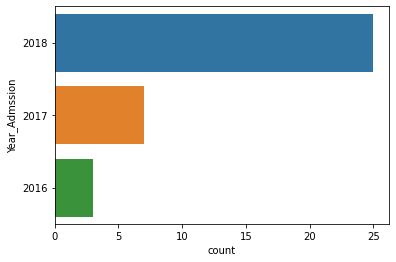

In [5]:
sns.countplot(y="Year_Admssion", data =df)
plt.show()

In [6]:
Sex = pd.read_csv(r"C:\Users\kelvin\OneDrive\Desktop\sex_ASP.csv")
print("Sex shape:",Sex.shape)
Sex.head()

Sex shape: (35, 1)


,Sex
0,Female
1,Male
2,Female
3,Male
4,Male


In [7]:
print("Number of male:", Sex[Sex["Sex"]=="Male"].value_counts())
print("Number of female:",Sex[Sex["Sex"]=="Female"].value_counts())

Number of male: Sex 
Male    22
dtype: int64
Number of female: Sex   
Female    13
dtype: int64


In [8]:
df = pd.concat([df,Sex],axis =1)
print("Sex shape:",df.shape)
df.head()

Sex shape: (35, 8)


,ID,Registration,SecodName,FirstName,Surname,Year_Admssion,Class_Honour,Sex
0,1,AS263/0524/2018,MUNGAI,TABITHA,NDUTA,2018,FIRST CLASS,Female
1,2,AS263/0553/2018,OSINDI,BONFACE,NaN,2018,SECOND UPPER,Male
2,3,AS283/0537/2018,KARIMI,CHRISTINE,NaN,2018,SECOND UPPER,Female
3,4,AS263/0540/2018,NYAMAI,MUTISO,DANIEL,2018,SECOND UPPER,Male
4,5,AS263/0517/2018,MURUCHI,STEPHEN,GICHUKI,2018,SECOND UPPER,Male


In [9]:
Sex.iloc[
        
        [6],
        :
        ]

,Sex
6,Male


In [10]:
df["Class_Honour"].unique()

array(['FIRST CLASS', 'SECOND UPPER', 'SECOND LOWER', 'PASS'],
      dtype=object)

In [11]:
df["Year_Admssion"].unique()

array(['2018', '2017', '2016'], dtype=object)

In [12]:
df.groupby("Class_Honour")["Year_Admssion"].value_counts()

Class_Honour  Year_Admssion
FIRST CLASS   2018              1
PASS          2018              1
SECOND LOWER  2018              9
              2017              6
              2016              3
SECOND UPPER  2018             14
              2017              1
Name: Year_Admssion, dtype: int64

In [13]:
df.groupby("Class_Honour")["Year_Admssion"].value_counts()

Class_Honour  Year_Admssion
FIRST CLASS   2018              1
PASS          2018              1
SECOND LOWER  2018              9
              2017              6
              2016              3
SECOND UPPER  2018             14
              2017              1
Name: Year_Admssion, dtype: int64

In [14]:
df.groupby("Class_Honour")["Sex"].value_counts()

Class_Honour  Sex   
FIRST CLASS   Female     1
PASS          Male       1
SECOND LOWER  Male      10
              Female     8
SECOND UPPER  Male      11
              Female     4
Name: Sex, dtype: int64

In [15]:
df["Year_Admssion"].unique()

array(['2018', '2017', '2016'], dtype=object)

In [16]:
df["Year"] = df["Year_Admssion"].replace(["2016","2017"],"Others")

In [17]:
df.groupby("Class_Honour")["Year"].value_counts()

Class_Honour  Year  
FIRST CLASS   2018       1
PASS          2018       1
SECOND LOWER  2018       9
              Others     9
SECOND UPPER  2018      14
              Others     1
Name: Year, dtype: int64

In [18]:
df[  (df["Year"]== "Others") & (df["Class_Honour"]== "SECOND UPPER" ) ]

,ID,Registration,SecodName,FirstName,Surname,Year_Admssion,Class_Honour,Sex,Year
9,10,AS263/1445/2017,MWANGI,EVANS,MUTUA,2017,SECOND UPPER,Male,Others


In [19]:
df.iloc[
      7,
      
]

ID                             8
Registration     AS263/0546/2018
SecodName                KIPSANG
FirstName                 KELVIN
Surname                      NaN
Year_Admssion               2018
Class_Honour        SECOND UPPER
Sex                         Male
Year                        2018
Name: 7, dtype: object

In [20]:
result = df.iloc[
      [0,1,2],
      [1,2,3,6]
]
result.head()

,Registration,SecodName,FirstName,Class_Honour
0,AS263/0524/2018,MUNGAI,TABITHA,FIRST CLASS
1,AS263/0553/2018,OSINDI,BONFACE,SECOND UPPER
2,AS283/0537/2018,KARIMI,CHRISTINE,SECOND UPPER


In [21]:
result =df.loc[:,["SecodName","Registration"]
      ]
result.head()

,SecodName,Registration
0,MUNGAI,AS263/0524/2018
1,OSINDI,AS263/0553/2018
2,KARIMI,AS283/0537/2018
3,NYAMAI,AS263/0540/2018
4,MURUCHI,AS263/0517/2018
